In [1]:
import numpy as np

from src.dataset import PandemicDataset
from src.problem import SIRProblem
from src.dinn import DINN
from src.plotter import Plotter

In [2]:
covid_data = np.genfromtxt('./datasets/SIR_data.csv', delimiter=',')
dataset = PandemicDataset('synth_sir', ['S', 'I', 'R'], 7900000, *covid_data)

In [3]:
epochs = 10000

iterations = 100
parameter_names = ['alpha', 'beta']
init_params = (np.zeros(iterations), np.zeros(iterations))
pred_params = (np.zeros(iterations), np.zeros(iterations))
true_params = (1/3, 1/2)

for i in range(iterations):
    print(f'Model {i+1}')
    problem = SIRProblem(dataset)
    plotter = Plotter()

    dinn = DINN(3, dataset, parameter_names, problem, plotter)
    for j, parameter_name in enumerate(parameter_names):
        init_params[j][i] = dinn.get_regulated_param(parameter_name)
    print(f'Initializations:\nAlpha:\t{init_params[0][i]}\nBeta:\t{init_params[1][i]}')
    dinn.configure_training(1e-3, 10000, scheduler_name='PolynomialLR')
    dinn.train()
    for j, parameter_name in enumerate(parameter_names):
        pred_params[j][i] = dinn.get_regulated_param(parameter_name)
    print(f'Prediction:\nAlpha:\t{pred_params[0][i]}\nBeta:\t{pred_params[1][i]}\n')

Model 1
Initializations:
Alpha:	0.48606929183006287
Beta:	0.628378689289093


Prediction:
Alpha:	0.3326372504234314
Beta:	0.49914342164993286

Model 2
Initializations:
Alpha:	0.379982590675354
Beta:	0.48859071731567383
Prediction:
Alpha:	0.3335087299346924
Beta:	0.5003198385238647

Model 3
Initializations:
Alpha:	0.5314449071884155
Beta:	0.21373368799686432
Prediction:
Alpha:	0.33333003520965576
Beta:	0.4999191164970398

Model 4
Initializations:
Alpha:	0.08945050835609436
Beta:	0.5099861025810242
Prediction:
Alpha:	0.3337097465991974
Beta:	0.5003129243850708

Model 5
Initializations:
Alpha:	0.40590915083885193
Beta:	0.6190703511238098
Prediction:
Alpha:	0.3327963054180145
Beta:	0.4995042681694031

Model 6
Initializations:
Alpha:	0.6308062076568604
Beta:	0.5018972158432007
Prediction:
Alpha:	0.3334309458732605
Beta:	0.49993935227394104

Model 7
Initializations:
Alpha:	0.6809554100036621
Beta:	0.4199368357658386
Prediction:
Alpha:	0.33326417207717896
Beta:	0.49988195300102234

Model 8
Initializations:
Alpha:	0.3490987718105316
Beta:	0.7039283514022827
Prediction:


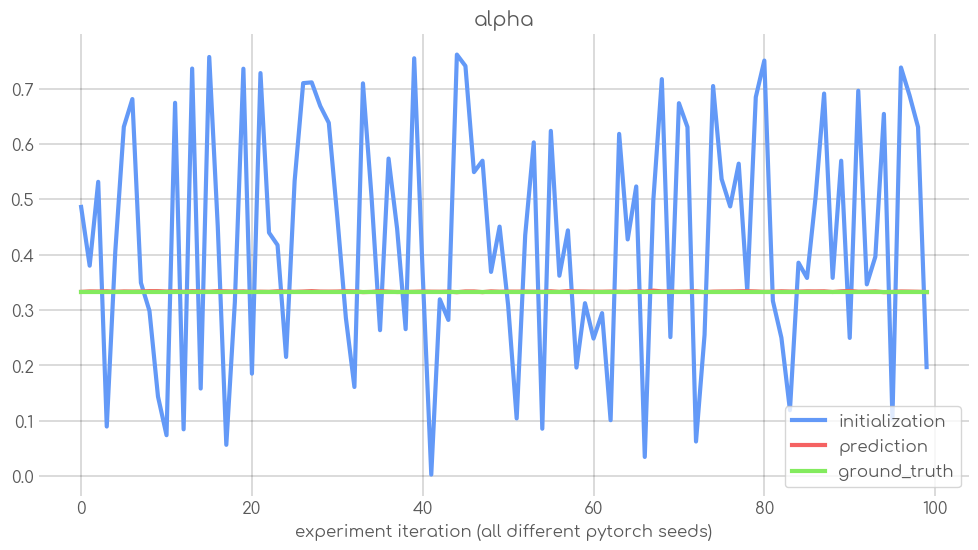

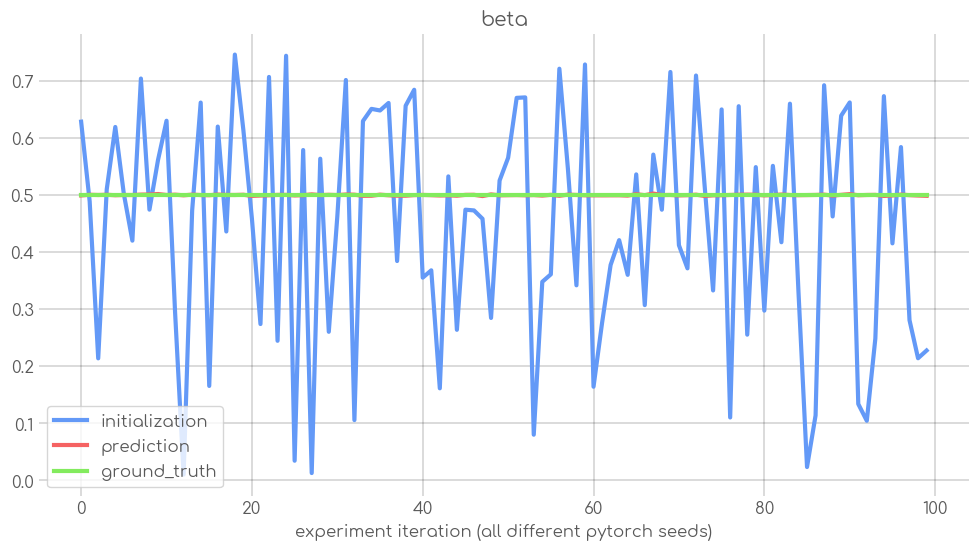

In [4]:
plotter = Plotter()
x = np.arange(0, iterations, 1)
for j, parameter_name in enumerate(parameter_names):
    plotter.plot(x, 
                 [init_params[j], pred_params[j], np.ones(iterations) * true_params[j]], 
                 ['initialization', 'prediction', 'ground_truth'], 
                 f'{parameter_name}_seed_test',
                 parameter_name,
                 (12, 6),
                 xlabel='experiment iteration (all different pytorch seeds)')
    